In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

In [ ]:
import sys
sys.path.insert(0,'drive/My Drive/proje')

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving GameData.csv to GameData.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "GameData.csv" with length 10315779 bytes


In [ ]:
import io
import pandas as pd
import numpy as np
data = pd.read_csv(io.StringIO(uploaded['GameData.csv'].decode('utf-8')))
data.head()

,user_id,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session
0,73318AACA7074CAB946B87B264B989CF,No,False,False,False,28.000000,mobile,Apple,IOS,iTunes,13.4.1,Norway,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,2.000000,1.0000,0.000000,0.000000,0.000000,0.0
1,E5E2A7BA7ABC4783ABC11B47376D9514,No,True,False,False,793.750000,mobile,Apple,IOS,iTunes,12.4.8,Iran,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,0.0,0.058824,0.0,0.0,0.0,0.058824,36.235294,1.0000,0.352941,0.117647,0.470588,0.0
2,40302B5040174012940444304038A1B9,No,False,False,False,103.000000,mobile,Apple,IOS,iTunes,13.6,Serbia,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.187500,0.0625,0.000000,0.000000,0.000000,0.0
3,cc6a65d1f8b8bc48bb29eee0791fe182,No,True,False,False,281.333333,mobile,Samsung,ANDROID,com.android.vending,9,United States,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,0.0,0.333333,0.0,0.0,0.0,0.333333,41.333333,2.0000,0.000000,0.000000,2.000000,0.0
4,c18a958719e52568eccf88156791c999,No,False,False,True,711.000000,mobile,Samsung,ANDROID,com.android.vending,10,United States,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,30.000000,4.0000,0.000000,0.000000,1.000000,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25548 entries, 0 to 25547
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        25548 non-null  object 
 1   is_limited_ad_tracking                         25548 non-null  object 
 2   ucgun_ard_arda_event                           25548 non-null  bool   
 3   has_app_exception                              25548 non-null  bool   
 4   app_removed_by_user                            25548 non-null  bool   
 5   avg_daily_event                                25548 non-null  float64
 6   device_category                                25548 non-null  object 
 7   mobile_brand_name                              25548 non-null  object 
 8   operating_system                               25548 non-null  object 
 9   max_appInfo_install_source                     255

In [ ]:
data[data.isnull().any(axis = 1)]

,user_id,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session


In [ ]:
data = data.drop(["user_id"], axis = 1) # ilk adımda ikisini çıkarıyorum.

In [ ]:
data.head(5)

,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session
0,No,False,False,False,28.000000,mobile,Apple,IOS,iTunes,13.4.1,Norway,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,2.000000,1.0000,0.000000,0.000000,0.000000,0.0
1,No,True,False,False,793.750000,mobile,Apple,IOS,iTunes,12.4.8,Iran,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,0.0,0.058824,0.0,0.0,0.0,0.058824,36.235294,1.0000,0.352941,0.117647,0.470588,0.0
2,No,False,False,False,103.000000,mobile,Apple,IOS,iTunes,13.6,Serbia,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.187500,0.0625,0.000000,0.000000,0.000000,0.0
3,No,True,False,False,281.333333,mobile,Samsung,ANDROID,com.android.vending,9,United States,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,0.0,0.333333,0.0,0.0,0.0,0.333333,41.333333,2.0000,0.000000,0.000000,2.000000,0.0
4,No,False,False,True,711.000000,mobile,Samsung,ANDROID,com.android.vending,10,United States,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,30.000000,4.0000,0.000000,0.000000,1.000000,1.0


In [ ]:
data.tail(5)

,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session
25543,No,False,False,False,10.0,tablet,Apple,IOS,iTunes,13.6.1,United States,False,False,False,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250823.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25544,No,False,False,False,36.0,tablet,Apple,IOS,iTunes,13.4.1,India,False,False,False,False,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,65452.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
25545,No,False,False,False,40.0,mobile,Apple,IOS,iTunes,13.6.1,United Kingdom,False,False,False,False,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,64866.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
25546,No,False,False,False,11.0,mobile,Apple,IOS,iTunes,13.6.1,Slovakia,False,False,False,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14001.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25547,No,False,False,False,3.0,mobile,Motorola,ANDROID,com.android.vending,9,Netherlands,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


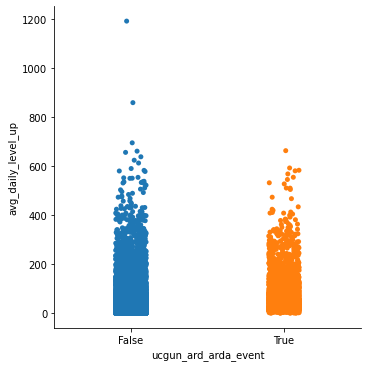

In [ ]:
import seaborn as sns
sns.catplot(x = "ucgun_ard_arda_event", y = "avg_daily_level_up", data = data);

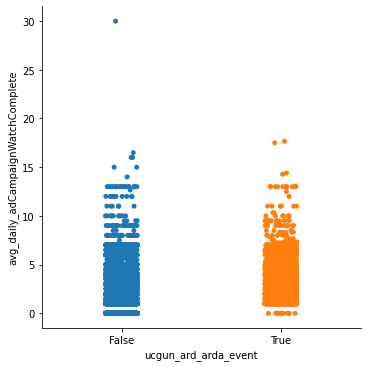

In [ ]:
sns.catplot(x = "ucgun_ard_arda_event", y = "avg_daily_adCampaignWatchComplete", data = data);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


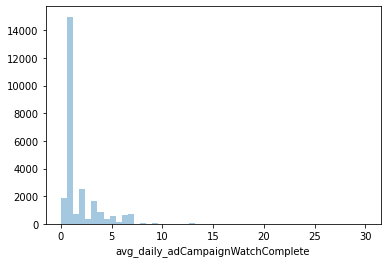

In [ ]:
sns.distplot(data.avg_daily_adCampaignWatchComplete, kde = False);

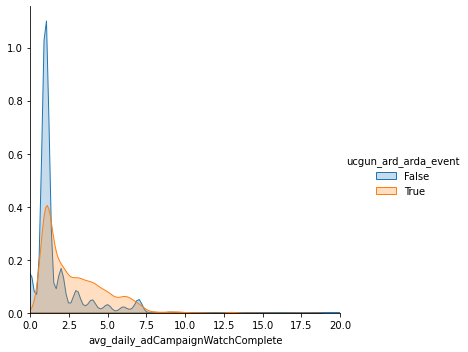

In [ ]:
(sns
 .FacetGrid(data,
              hue = "ucgun_ard_arda_event",
              height = 5,
              xlim = (0, 20))
 .map(sns.kdeplot, "avg_daily_adCampaignWatchComplete", shade= True)
 .add_legend()
);

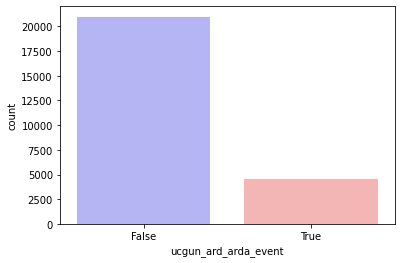

In [ ]:
import seaborn as sns
sns.countplot(x="ucgun_ard_arda_event", data=data, palette="bwr")

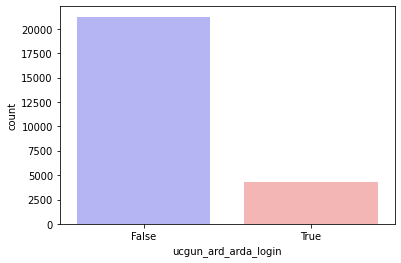

In [ ]:
sns.countplot(x="ucgun_ard_arda_login", data=data, palette="bwr")

In [ ]:
countNo = len(data[data.ucgun_ard_arda_login == False])
countYes = len(data[data.ucgun_ard_arda_login == True])
print("Üç gün art arda login yapmayanların yüzdesi : {:.2f}%".format((countNo / (len(data.ucgun_ard_arda_login))*100)))
print("Üç gün art arda login yapmayanların yüzdesi : {:.2f}%".format((countYes / (len(data.ucgun_ard_arda_login))*100)))

Üç gün art arda login yapmayanların yüzdesi : 83.12%
Üç gün art arda login yapmayanların yüzdesi : 16.88%


In [ ]:
countNo = len(data[data.ucgun_ard_arda_event == False])
countYes = len(data[data.ucgun_ard_arda_event == True])
print("Üç gün art arda event yapmayanların yüzdesi : {:.2f}%".format((countNo / (len(data.ucgun_ard_arda_login))*100)))
print("Üç gün art arda event yapanların yüzdesi : {:.2f}%".format((countYes / (len(data.ucgun_ard_arda_login))*100)))

Üç gün art arda event yapmayanların yüzdesi : 82.08%
Üç gün art arda event yapanların yüzdesi : 17.92%


In [ ]:
countNo = len(data[data.ucgun_ard_arda_session_start == False])
countYes = len(data[data.ucgun_ard_arda_session_start == True])
print("Üç gün art arda session start yapmayanların yüzdesi : {:.2f}%".format((countNo / (len(data.ucgun_ard_arda_session_start))*100)))
print("Üç gün art arda session start yapanların yüzdesi : {:.2f}%".format((countYes / (len(data.ucgun_ard_arda_session_start))*100)))


Üç gün art arda session start yapmayanların yüzdesi : 82.68%
Üç gün art arda session start yapanların yüzdesi : 17.32%


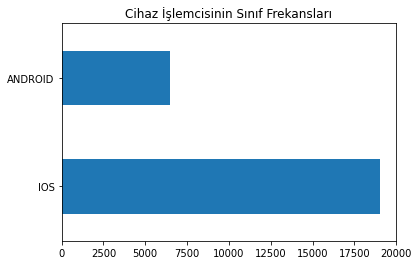

In [ ]:
data["operating_system"].value_counts().plot.barh().set_title("Cihaz İşlemcisinin Sınıf Frekansları");

In [ ]:
data["device_category"].value_counts().plot.barh().set_title("Cihaz Türünün Sınıf Frekansları") # ÖNEMSİZ

In [ ]:
kat_df = data.select_dtypes(include = ["object"])
kat_df.head(2)

,is_limited_ad_tracking,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event
0,No,mobile,Apple,IOS,iTunes,13.4.1,Norway
1,No,mobile,Apple,IOS,iTunes,12.4.8,Iran


In [ ]:
kat_df = data.select_dtypes(include = ["bool"])
kat_df.head()

,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user
0,False,False,False,False,False,False,False
1,True,False,False,False,False,True,True
2,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,True


In [ ]:
data1=data.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data1['target_encod']= label_encoder.fit_transform(data1['ucgun_ard_arda_event'])

data1.head()
# data1["ucgun_ard_arda_event"] = data1["ucgun_ard_arda_event"].astype(int)

,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session,target_encod
0,No,False,False,False,28.000000,mobile,Apple,IOS,iTunes,13.4.1,Norway,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,2.000000,1.0000,0.000000,0.000000,0.000000,0.0,0
1,No,True,False,False,793.750000,mobile,Apple,IOS,iTunes,12.4.8,Iran,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,0.0,0.058824,0.0,0.0,0.0,0.058824,36.235294,1.0000,0.352941,0.117647,0.470588,0.0,1
2,No,False,False,False,103.000000,mobile,Apple,IOS,iTunes,13.6,Serbia,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.187500,0.0625,0.000000,0.000000,0.000000,0.0,0
3,No,True,False,False,281.333333,mobile,Samsung,ANDROID,com.android.vending,9,United States,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,0.0,0.333333,0.0,0.0,0.0,0.333333,41.333333,2.0000,0.000000,0.000000,2.000000,0.0,1
4,No,False,False,True,711.000000,mobile,Samsung,ANDROID,com.android.vending,10,United States,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,30.000000,4.0000,0.000000,0.000000,1.000000,1.0,0


In [ ]:
data1["target_encod"] = data1.target_encod.astype('category')
# data1["game_intro_completed_by_user"] = data1["game_intro_completed_by_user"].astype(int)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25548 entries, 0 to 25547
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   is_limited_ad_tracking                         25548 non-null  object  
 1   ucgun_ard_arda_event                           25548 non-null  bool    
 2   has_app_exception                              25548 non-null  bool    
 3   app_removed_by_user                            25548 non-null  bool    
 4   avg_daily_event                                25548 non-null  float64 
 5   device_category                                25548 non-null  object  
 6   mobile_brand_name                              25548 non-null  object  
 7   operating_system                               25548 non-null  object  
 8   max_appInfo_install_source                     25548 non-null  object  
 9   max_operating_system_version           

In [ ]:
#data1["has_app_exception"] = data1["has_app_exception"].astype(int)
#data1["app_removed_by_user"] = data1["app_removed_by_user"].astype(int)
#data1["os_updated_by_user"] = data1["os_updated_by_user"].astype(int)
#data1["app_updated_by_user"] = data1["app_updated_by_user"].astype(int)
#data1["tutorial_end_by_user"] = data1["tutorial_end_by_user"].astype(int)
#data1["game_intro_completed_by_user"] = data1["game_intro_completed_by_user"].astype(int)

In [ ]:
kat_df = data.select_dtypes(include = ["object"])
kat_df.head(1)

,is_limited_ad_tracking,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event
0,No,mobile,Apple,IOS,iTunes,13.4.1,Norway


In [ ]:
a = pd.get_dummies(data['is_limited_ad_tracking'], prefix = "is_limited_ad_tracking")
b = pd.get_dummies(data['device_category'], prefix = "device_category")
c = pd.get_dummies(data['mobile_brand_name'], prefix = "mobile_brand_name")
d = pd.get_dummies(data['operating_system'], prefix = "operating_system")
e = pd.get_dummies(data['max_appInfo_install_source'], prefix = "max_appInfo_install_source")
f = pd.get_dummies(data['country_max_event'], prefix = "country_max_event")


In [ ]:
frames = [data1, a, b, c,d,e,f]
data1 = pd.concat(frames, axis = 1) #concat=birleştirmek
data1.head()

,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,No,False,False,False,28.000000,mobile,Apple,IOS,iTunes,13.4.1,Norway,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No,True,False,False,793.750000,mobile,Apple,IOS,iTunes,12.4.8,Iran,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No,False,False,False,103.000000,mobile,Apple,IOS,iTunes,13.6,Serbia,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,True,False,False,281.333333,mobile,Samsung,ANDROID,com.android.vending,9,United States,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,No,False,False,True,711.000000,mobile,Samsung,ANDROID,com.android.vending,10,United States,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data1 = data1.drop(columns = ['is_limited_ad_tracking', 'device_category', 'mobile_brand_name','operating_system','max_appInfo_install_source','country_max_event'])
data1.head()

,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,max_operating_system_version,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,False,False,False,28.000000,13.4.1,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,True,False,False,793.750000,12.4.8,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,False,103.000000,13.6,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,True,False,False,281.333333,9,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,False,False,True,711.000000,10,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25548 entries, 0 to 25547
Columns: 239 entries, ucgun_ard_arda_event to country_max_event_Vietnam
dtypes: bool(7), category(1), float64(46), object(1), uint8(184)
memory usage: 13.8+ MB


In [ ]:
data1 = data1.drop(columns = ['ucgun_ard_arda_event','max_operating_system_version'])
data1.head()

,has_app_exception,app_removed_by_user,avg_daily_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,False,False,28.000000,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,False,793.750000,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,103.000000,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,False,281.333333,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,711.000000,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.00000

In [ ]:
y = data1.target_encod.values
x = data1.drop(['target_encod'],axis = 1)

In [ ]:
y

[0, 1, 0, 1, 0, ..., 0, 0, 0, 0, 0]
Length: 25548
Categories (2, int64): [0, 1]

In [ ]:
x.head()

,has_app_exception,app_removed_by_user,avg_daily_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,False,False,28.000000,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,False,793.750000,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,103.000000,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,False,281.333333,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,711.000000,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.00000

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

## XGBOOST

In [ ]:
xgb_model = XGBClassifier().fit(x_train, y_train)

In [ ]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9445531637312459

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.85      1358

    accuracy                           0.94      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.95      0.94      0.94      7665



Text(0.5, 24.0, 'predicted label')

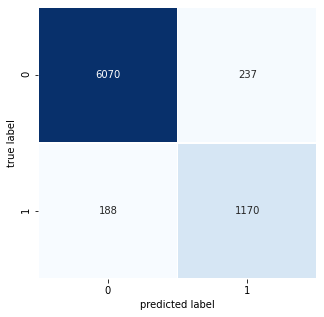

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

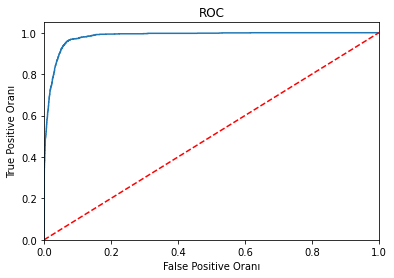

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,xgb_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
## model tuning
xgb_params = {
    'n_estimators': [100, 500],
    'subsample': [0.6, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1,0.01,0.02],
    "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 98.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
           

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
xgb = XGBClassifier(max_depth = xgb_cv_model.best_params_["max_depth"],
                                 learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                                 min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                                 n_estimators = xgb_cv_model.best_params_["n_estimators"],
                                 subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned = xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9441617742987606

Text(0.5, 24.0, 'predicted label')

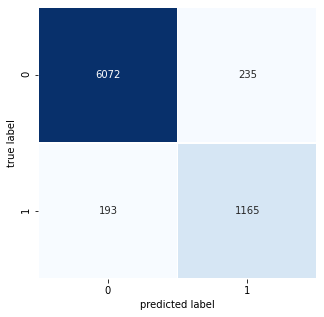

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

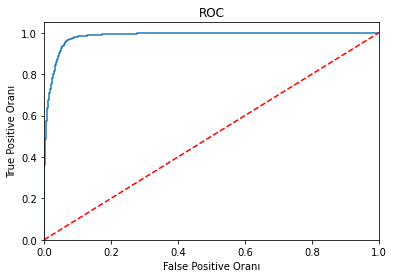

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,xgb_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.84      1358

    accuracy                           0.94      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.94      0.94      0.94      7665



In [ ]:
### Düzenleme


,has_app_exception,app_removed_by_user,avg_daily_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,False,False,28.000000,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,False,793.750000,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,103.000000,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,False,281.333333,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,711.000000,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.00000

In [ ]:
import io
import pandas as pd
import numpy as np
data = pd.read_csv(io.StringIO(uploaded['GameData.csv'].decode('utf-8')))
data.head()

,user_id,is_limited_ad_tracking,ucgun_ard_arda_event,has_app_exception,app_removed_by_user,avg_daily_event,device_category,mobile_brand_name,operating_system,max_appInfo_install_source,max_operating_system_version,country_max_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,avg_OpenactiveAdCampaignAmount_session,avg_ExitactiveAdCampaignAmount_session,avg_StartactiveAdCampaignAmount_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_CompleteactiveAdCampaignAmount_session,avg_error_session,avg_level_up_session,avg_unlockedWorker_session,avg_AD_CAMPAIGN_X2_CASH_session,avg_IDLE_CASH_AD_session,avg_ROCKET_AD_session,avg_UFO_AD_session
0,73318AACA7074CAB946B87B264B989CF,No,False,False,False,28.000000,mobile,Apple,IOS,iTunes,13.4.1,Norway,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,2.000000,1.0000,0.000000,0.000000,0.000000,0.0
1,E5E2A7BA7ABC4783ABC11B47376D9514,No,True,False,False,793.750000,mobile,Apple,IOS,iTunes,12.4.8,Iran,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,0.0,0.058824,0.0,0.0,0.0,0.058824,36.235294,1.0000,0.352941,0.117647,0.470588,0.0
2,40302B5040174012940444304038A1B9,No,False,False,False,103.000000,mobile,Apple,IOS,iTunes,13.6,Serbia,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.187500,0.0625,0.000000,0.000000,0.000000,0.0
3,cc6a65d1f8b8bc48bb29eee0791fe182,No,True,False,False,281.333333,mobile,Samsung,ANDROID,com.android.vending,9,United States,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,0.0,0.333333,0.0,0.0,0.0,0.333333,41.333333,2.0000,0.000000,0.000000,2.000000,0.0
4,c18a958719e52568eccf88156791c999,No,False,False,True,711.000000,mobile,Samsung,ANDROID,com.android.vending,10,United States,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,30.000000,4.0000,0.000000,0.000000,1.000000,1.0


In [ ]:
data = data.drop(["user_id"], axis = 1) # ilk adımda ikisini çıkarıyorum

In [ ]:
data1=data.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data1['target_encod']= label_encoder.fit_transform(data1['ucgun_ard_arda_event'])
data1["target_encod"] = data1.target_encod.astype('category')
a = pd.get_dummies(data['is_limited_ad_tracking'], prefix = "is_limited_ad_tracking")
b = pd.get_dummies(data['device_category'], prefix = "device_category")
c = pd.get_dummies(data['mobile_brand_name'], prefix = "mobile_brand_name")
d = pd.get_dummies(data['operating_system'], prefix = "operating_system")
e = pd.get_dummies(data['max_appInfo_install_source'], prefix = "max_appInfo_install_source")
f = pd.get_dummies(data['country_max_event'], prefix = "country_max_event")
frames = [data1, a, b, c,d,e,f]
data1 = pd.concat(frames, axis = 1) #concat=birleştirmek
data1 = data1.drop(columns = ['is_limited_ad_tracking', 'device_category', 'mobile_brand_name','operating_system','max_appInfo_install_source','country_max_event'])
data1 = data1.drop(columns = ['ucgun_ard_arda_event','max_operating_system_version'])
data1.head()



,has_app_exception,app_removed_by_user,avg_daily_event,os_updated_by_user,app_updated_by_user,tutorial_end_by_user,game_intro_completed_by_user,avg_daily_session_start,avg_daily_level_up,avg_daily_login,avg_daily_adCampaignWatchComplete,avg_daily_workerUpgradeMethodExpensiveProduct,avg_daily_workerUpgradeAmount,avg_daily_workerUpgradeMethodLowestCost,avg_daily_rocketAdWatchComplete,avg_daily_error,avg_daily_unlockedWorker,avg_daily_earningRateBoost,avg_daily_rocketAdAppear,avg_daily_ufoAdWatchComplete,avg_daily_unlockedFactory,avg_daily_productScreenClick,avg_daily_ad_reward,avg_daily_workerUpgradeUpgradeMultiplierMax,avg_worker_session,avg_factory_session,avg_transporter_session,avg_baseStation_session,avg_RewardedVideo_session,avg_upgradeAmount_session,avg_totalElapsedTime_session,avg_earningRateValue_session,avg_freeride_session,avg_uengagement_time_msec_session,avg_sengagement_time_msec_session,avg_reward_value_session,avg_maxupgradeMultiplierValue_session,avg_x1upgradeMultiplierValue_session,avg_x10upgradeMultiplierValue_session,avg_x50upgradeMultiplierValue_session,...,country_max_event_Nepal,country_max_event_Netherlands,country_max_event_New Caledonia,country_max_event_New Zealand,country_max_event_North Macedonia,country_max_event_Northern Mariana Islands,country_max_event_Norway,country_max_event_Pakistan,country_max_event_Peru,country_max_event_Philippines,country_max_event_Poland,country_max_event_Portugal,country_max_event_Puerto Rico,country_max_event_Qatar,country_max_event_Romania,country_max_event_Russia,country_max_event_Réunion,country_max_event_Saudi Arabia,country_max_event_Serbia,country_max_event_Singapore,country_max_event_Slovakia,country_max_event_Slovenia,country_max_event_South Africa,country_max_event_South Korea,country_max_event_Spain,country_max_event_Sweden,country_max_event_Switzerland,country_max_event_Taiwan,country_max_event_Tanzania,country_max_event_Thailand,country_max_event_Turkey,country_max_event_U.S. Virgin Islands,country_max_event_Ukraine,country_max_event_United Arab Emirates,country_max_event_United Kingdom,country_max_event_United States,country_max_event_Unknown,country_max_event_Uzbekistan,country_max_event_Venezuela,country_max_event_Vietnam
0,False,False,28.000000,False,False,False,False,1.00,2.000000,1.00,1.00,0.0,0.000000,0.0,0.0,1.0,1.00,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.134100e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,False,793.750000,False,False,True,True,4.25,154.000000,3.25,1.75,0.0,59.500000,12.0,4.0,1.0,4.25,15.500000,9.750000,0.0,1.0,1.5,0.0,92.5,14.000000,8.058824,13.235294,0.941176,0.941176,490.117647,114.882353,156.236075,0.0,5.890805e+05,0.000000,0.0,316.176471,10.411765,4.882353,2.294118,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,103.000000,False,False,False,False,2.00,19.000000,2.00,0.00,0.0,7.000000,0.0,0.0,0.0,1.00,2.000000,1.000000,0.0,0.0,0.0,0.0,7.0,0.437500,0.187500,0.437500,0.125000,0.000000,5.750000,2.187500,5.962976,0.0,1.410162e+04,0.000000,0.0,5.750000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,False,281.333333,False,False,True,False,1.00,41.333333,1.00,1.00,0.0,16.333333,9.0,6.0,1.0,2.00,12.333333,16.333333,0.0,1.0,0.0,6.0,0.0,16.333333,11.666667,12.333333,1.000000,2.000000,484.666667,234.333333,175.968473,5.0,6.572923e+05,376739.666667,2.0,0.000000,24.666667,32.666667,2.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,711.000000,False,False,True,True,1.00,30.000000,1.00,1.00,0.0,16.000000,11.0,1.0,1.0,4.00,11.000000,10.000000,1.0,1.0,1.0,2.0,0.0,16.000000,7.000000,6.000000,1.000000,2.000000,434.000000,66.000000,73.615406,5.0,1.611844e+06,699530.000000,2.0,0.000000,434.000000,0.00000

In [ ]:
data1.to_csv("gamedata_son.csv",index=None)

LIGHT BOOST



In [ ]:
y = data1.target_encod.values
x = data1.drop(['target_encod'],axis = 1)

In [ ]:
y

[0, 1, 0, 1, 0, ..., 0, 0, 0, 0, 0]
Length: 25548
Categories (2, int64): [0, 1]

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9475538160469668

Text(0.5, 24.0, 'predicted label')

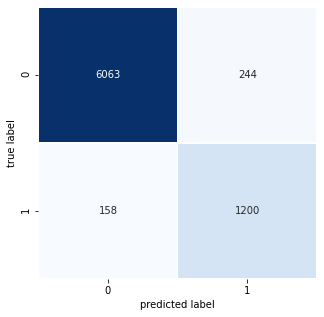

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

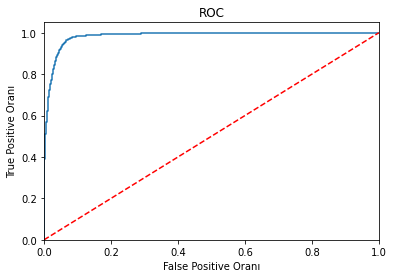

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.88      0.86      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



In [ ]:
lgbm_params = {
    'n_estimators': [100, 500],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1,0.01,0.02],
    "min_child_samples": [5,10,20]}

In [ ]:
lgbm_cv_model.fit(x_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 11.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth

In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 10,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
lgbm = LGBMClassifier(max_depth = lgbm_cv_model.best_params_["max_depth"],
                    learning_rate = lgbm_cv_model.best_params_["learning_rate"], 
                    min_child_samples = lgbm_cv_model.best_params_["min_child_samples"],
                    n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                    subsample = lgbm_cv_model.best_params_["subsample"])

In [ ]:
lgbm_tuned = lgbm.fit(x_train,y_train)
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9475538160469668

Text(0.5, 24.0, 'predicted label')

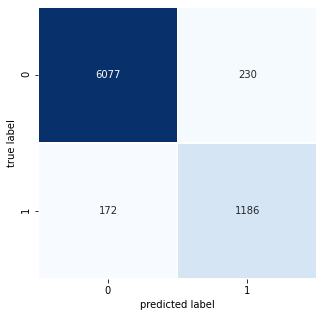

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

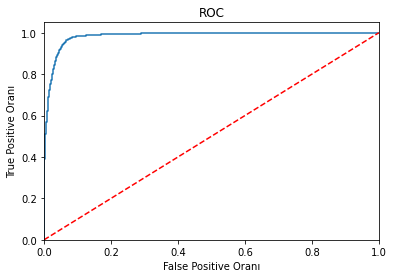

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.84      0.87      0.86      1358

    accuracy                           0.95      7665
   macro avg       0.91      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



# **### Importance değişkenler ile model kurulması**

In [ ]:
y = data1.target_encod.values
x = data1.drop(['target_encod'],axis = 1)
ximp = x[["avg_IDLE_CASH_AD_session",
          "avg_maxupgradeMultiplierValue_session",
          "avg_ROCKET_AD_session",
          "avg_daily_adCampaignWatchComplete",
          "avg_reward_value_session",
          "avg_NoncompleteactiveAdCampaignAmount_session",
          "avg_x10upgradeMultiplierValue_session",
          "avg_transporter_session",
          "avg_daily_rocketAdAppear",
          "avg_daily_workerUpgradeMethodLowestCost",
          "avg_x50upgradeMultiplierValue_session",
          "avg_daily_ad_reward",
          "avg_AD_CAMPAIGN_X2_CASH_session",
          "avg_factory_session",
          "avg_RewardedVideo_session",
          "avg_daily_level_up",
          "avg_daily_workerUpgradeAmount",
          "avg_level_up_session",
          "avg_x1upgradeMultiplierValue_session",
          "avg_daily_unlockedWorker",
          "avg_worker_session",
          "avg_daily_earningRateBoost",
          "avg_uengagement_time_msec_session",
          "avg_daily_event",
          "avg_upgradeAmount_session",
          "avg_daily_login",
          "avg_earningRateValue_session", 
          "app_updated_by_user",
          "avg_baseStation_session",
          "avg_totalElapsedTime_session",
          "avg_daily_session_start",
          "avg_unlockedWorker_session",
          "avg_ExitactiveAdCampaignAmount_session",
          "avg_error_session"]]


In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ximp, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
xgb_model = XGBClassifier().fit(x_train, y_train)

In [ ]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9449445531637313

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.85      1358

    accuracy                           0.94      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.95      0.94      0.95      7665



Text(0.5, 24.0, 'predicted label')

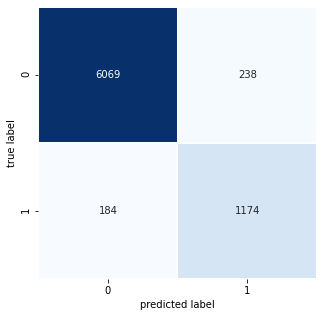

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

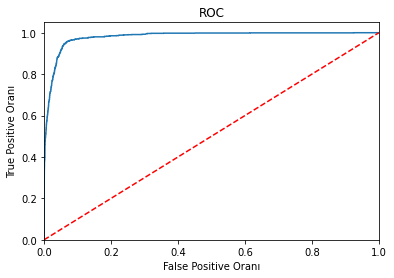

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,xgb_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**XGBOOST MODEL TUNING**

In [ ]:
## model tuning
xgb_params = {
    'n_estimators': [100, 500],
    'subsample': [0.6, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1,0.01,0.02],
    "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 22.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
           

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [ ]:
xgb = XGBClassifier(max_depth = xgb_cv_model.best_params_["max_depth"],
                    learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned = xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.945075016307893

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.85      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

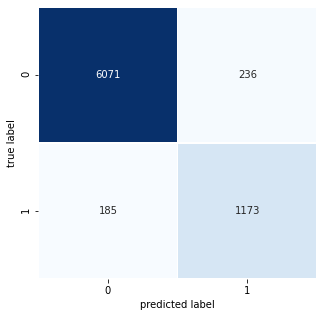

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

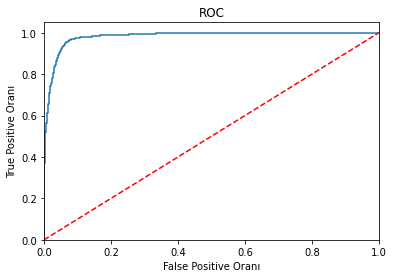

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,xgb_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9445531637312459

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.85      1358

    accuracy                           0.94      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.95      0.94      0.94      7665



Text(0.5, 24.0, 'predicted label')

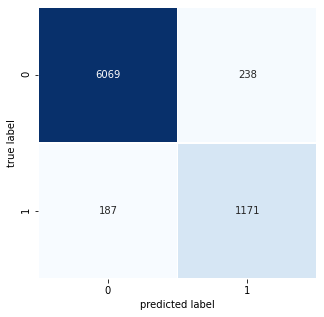

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

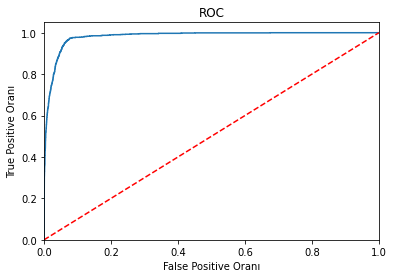

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
lgbm_params = {'n_estimators': [100, 500],
               'subsample': [0.6, 0.8, 1.0],
               'max_depth': [3, 4, 5],
               'learning_rate': [0.1,0.01,0.02],
               "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 3, 
                             n_jobs = -1, 
                             verbose = 2)

In [ ]:
lgbm_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth

In [ ]:
lgbm = LGBMClassifier(max_depth = lgbm_cv_model.best_params_["max_depth"],
                      learning_rate = lgbm_cv_model.best_params_["learning_rate"], 
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      subsample = lgbm_cv_model.best_params_["subsample"])

In [ ]:
lgbm_tuned = lgbm.fit(x_train,y_train)
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.946249184605349

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.87      0.85      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

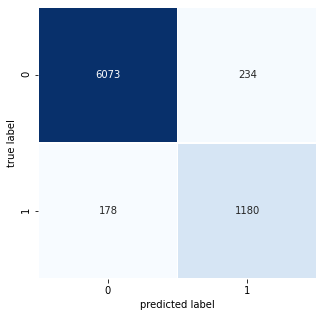

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

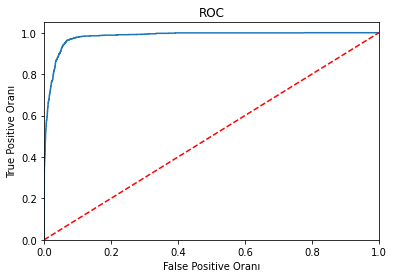

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**STANDARTLAŞTIRMA**

In [ ]:
ximp.head()

,avg_IDLE_CASH_AD_session,avg_maxupgradeMultiplierValue_session,avg_ROCKET_AD_session,avg_daily_adCampaignWatchComplete,avg_reward_value_session,avg_NoncompleteactiveAdCampaignAmount_session,avg_x10upgradeMultiplierValue_session,avg_transporter_session,avg_daily_rocketAdAppear,avg_daily_workerUpgradeMethodLowestCost,avg_x50upgradeMultiplierValue_session,avg_daily_ad_reward,avg_AD_CAMPAIGN_X2_CASH_session,avg_factory_session,avg_RewardedVideo_session,avg_daily_level_up,avg_daily_workerUpgradeAmount,avg_level_up_session,avg_x1upgradeMultiplierValue_session,avg_daily_unlockedWorker,avg_worker_session,avg_daily_earningRateBoost,avg_uengagement_time_msec_session,avg_daily_event,avg_upgradeAmount_session,avg_daily_login,avg_earningRateValue_session,app_updated_by_user,avg_baseStation_session,avg_totalElapsedTime_session,avg_daily_session_start,avg_unlockedWorker_session,avg_ExitactiveAdCampaignAmount_session,avg_error_session
0,0.000000,0.000000,0.000000,1.00,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.00,0.000000,0.000000,6.134100e+04,28.000000,0.000000,1.00,0.000000,False,0.000000,0.000000,1.00,1.0000,1.000000,1.000000
1,0.117647,316.176471,0.470588,1.75,0.0,0.0,4.882353,13.235294,9.750000,12.0,2.294118,0.0,0.352941,8.058824,0.941176,154.000000,59.500000,36.235294,10.411765,4.25,14.000000,15.500000,5.890805e+05,793.750000,490.117647,3.25,156.236075,False,0.941176,114.882353,4.25,1.0000,0.058824,0.058824
2,0.000000,5.750000,0.000000,0.00,0.0,0.0,0.000000,0.437500,1.000000,0.0,0.000000,0.0,0.000000,0.187500,0.000000,19.000000,7.000000,1.187500,0.000000,1.00,0.437500,2.000000,1.410162e+04,103.000000,5.750000,2.00,5.962976,False,0.125000,2.187500,2.00,0.0625,0.000000,0.000000
3,0.000000,0.000000,2.000000,1.00,2.0,0.0,32.666667,12.333333,16.333333,9.0,2.666667,6.0,0.000000,11.666667,2.000000,41.333333,16.333333,41.333333,24.666667,2.00,16.333333,12.333333,6.572923e+05,281.333333,484.666667,1.00,175.968473,False,1.000000,234.333333,1.00,2.0000,0.333333,0.333333
4,0.000000,0.000000,1.000000,1.00,2.0,0.0,0.000000,6.000000,10.000000,11.0,0.000000,2.0,0.000000,7.000000,2.000000,30.000000,16.000000,30.000000,434.000000,4.00,16.000000,11.000000,1.611844e+06,711.000000,434.000000,1.00,73.615406,False,1.000000,66.000000,1.00,4.0000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ximp, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
xgb_model = XGBClassifier().fit(x_train, y_train)

In [ ]:
accuracy_score(y_test,y_pred)

0.946249184605349

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.87      0.85      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

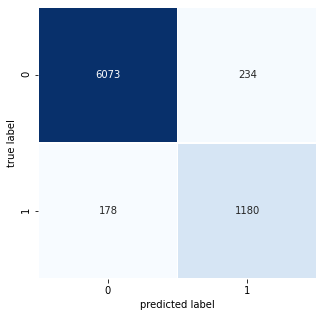

In [ ]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

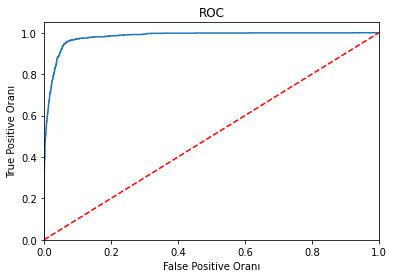

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
## model tuning
xgb_params = {
    'n_estimators': [100, 500],
    'subsample': [0.6, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1,0.01,0.02],
    "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 22.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
           

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [ ]:
xgb = XGBClassifier(max_depth = xgb_cv_model.best_params_["max_depth"],
                    learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned = xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9465101108936725

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.87      0.85      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

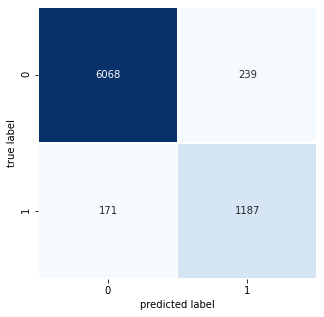

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

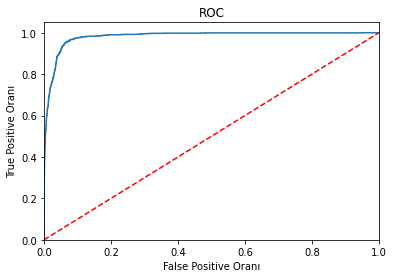

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**0.6'dan BÜYÜK KORELE OLANLAR**

In [ ]:
x_corr=x.drop(columns=['avg_daily_level_up',
                       'avg_daily_workerUpgradeAmount',
                       'avg_daily_rocketAdWatchComplete',
                       'avg_daily_rocketAdWatchComplete',
                       'avg_daily_earningRateBoost',
                       'avg_worker_session',
                       'avg_transporter_session', 
                       'avg_baseStation_session', 
                       'avg_RewardedVideo_session',
                       'avg_upgradeAmount_session',
                       'avg_OpenactiveAdCampaignAmount_session',
                       'avg_ExitactiveAdCampaignAmount_session',
                       'avg_unlockedWorker_session',
                       'avg_NoncompleteactiveAdCampaignAmount_session'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_corr, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
xgb_model = XGBClassifier().fit(x_train, y_train)

In [ ]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9442922374429223

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.83      0.86      0.85      1358

    accuracy                           0.94      7665
   macro avg       0.90      0.91      0.91      7665
weighted avg       0.95      0.94      0.94      7665



Text(0.5, 24.0, 'predicted label')

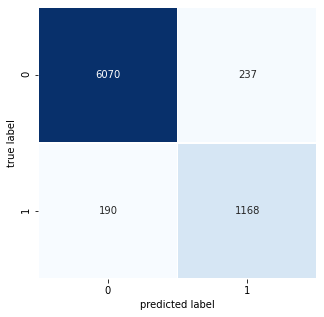

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

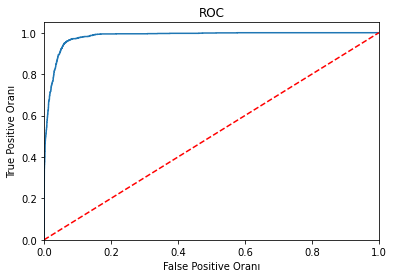

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**MODEL TUNING**

In [ ]:
## model tuning
xgb_params = {
    'n_estimators': [100, 500],
    'subsample': [0.6, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1,0.01,0.02],
    "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 90.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
           

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [ ]:
xgb = XGBClassifier(max_depth = xgb_cv_model.best_params_["max_depth"],
                    learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [ ]:
xgb_tuned = xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9478147423352903

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.84      0.87      0.86      1358

    accuracy                           0.95      7665
   macro avg       0.91      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

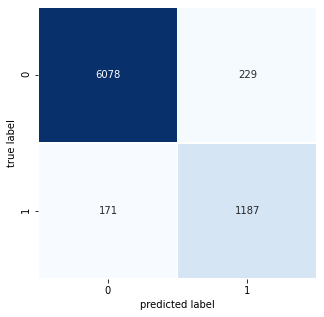

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

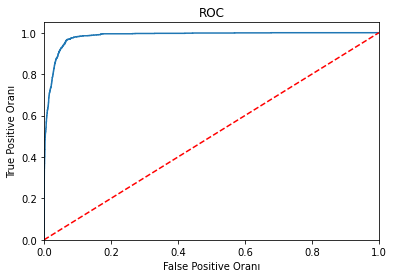

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**Light Boost**

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9466405740378343

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.84      0.87      0.85      1358

    accuracy                           0.95      7665
   macro avg       0.90      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

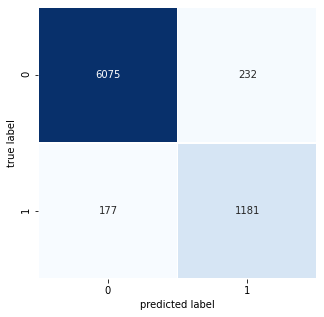

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

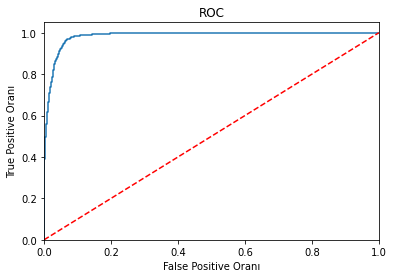

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
lgbm_params = {'n_estimators': [100, 500],
               'subsample': [0.6, 0.8, 1.0],
               'max_depth': [3, 4, 5],
               'learning_rate': [0.1,0.01,0.02],
               "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 3, 
                             n_jobs = -1, 
                             verbose = 2)

In [ ]:
lgbm_cv_model.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  9.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth

In [ ]:
lgbm = LGBMClassifier(max_depth = lgbm_cv_model.best_params_["max_depth"],
                      learning_rate = lgbm_cv_model.best_params_["learning_rate"], 
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      subsample = lgbm_cv_model.best_params_["subsample"])

In [ ]:
lgbm_tuned = lgbm.fit(x_train,y_train)
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9483365949119373

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6307
           1       0.84      0.88      0.86      1358

    accuracy                           0.95      7665
   macro avg       0.91      0.92      0.91      7665
weighted avg       0.95      0.95      0.95      7665



Text(0.5, 24.0, 'predicted label')

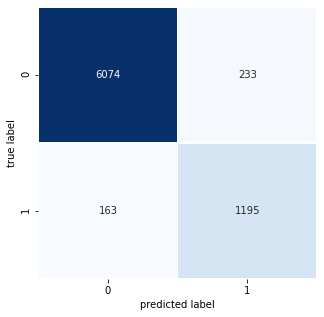

In [ ]:
mtx = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

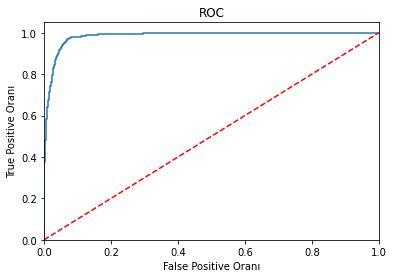

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,lgbm_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()